# 0. Importação de bibliotecas e Leitura das bases

In [1]:
import geopandas as gpd # Leitura e manipulação de dados
import seaborn as sns # Gráficos
import matplotlib.pyplot as plt # Gráficos 

In [2]:
cnuc = gpd.read_file("areas-PA/areas-de-interesse/cnuc/cnuc_pa_dados.shp")
quilombola = gpd.read_file("areas-PA/areas-de-interesse/quilombola/quilombola_pa_dados.shp")
tis = gpd.read_file("areas-PA/areas-de-interesse/tis/tis_pa_dados.shp")

In [3]:
print("CNUC: {}, Quilombola: {}, TIS: {}".format(cnuc.shape[0], quilombola.shape[0], tis.shape[0]))

CNUC: 96, Quilombola: 84, TIS: 51


In [4]:
cnuc.sample(5)

nome_uc   ha_total    uf  \
88            RESERVA EXTRATIVISTA TAPAJÓS - ARAPIUNS  677317.56  PARÁ   
95                FLORESTA NACIONAL DE SARACÁ-TAQUERA  441280.79  PARÁ   
91                      RESERVA EXTRATIVISTA MARACANÃ   30179.15  PARÁ   
83                        FLORESTA NACIONAL DE MULATA   215544.8  PARÁ   
33  RESERVA DE DESENVOLVIMENTO SUSTENTÁVEL PUCURUÍ...   29165.19  PARÁ   

                         municipio situacao       a_sigef  c_sigef  \
88               aveiro , santarem    Ativo  9.407277e+07       69   
95  faro , oriximina , terra santa    Ativo  6.560010e+07       98   
91                        maracana    Ativo  1.154040e+06       56   
83         alenquer , monte alegre    Ativo  4.770748e+08       70   
33     novo repartimento , tucurui    Ativo  1.381425e+08       99   

      a_alertas  c_alertas                                           geometry  
88   4402030.30        216  POLYGON ((-55.02526 -2.34586, -55.02657 -2.347...  
95  22837520.87        141  POLYGON ((-56.86214 -1.39006, -56.8616 -1.3906...  
91     34641.85          3  MULTIPOLYGON (((-47.39494 -0.95704, -47.39529 ...  
83    592452.12         20  MULTIPOLYGON (((-54.22599 -1.30178, -54.30236 ...  
33   1104226.19         24  POLYGON ((-49.72754 -3.9913, -49.72696 -3.9920...

In [5]:
quilombola.sample(5)

nm_comunid  \
18                                   MURATUBINHA   
62  IGARAPE PRETO, BAIXINHA, PANPELONIA, TEOFILO   
38                                      JACUNDAY   
24                                       NARCISA   
1                                      CAMIRANGA   

                                   nm_municip  nr_familia  nr_area_ha  \
18                                     obidos       132.0         NaN   
62  oeiras do para / baiao / mocajuba / bagre        28.0    830.8776   
38                               moju / acara        60.0   1701.5887   
24                               capitao poco         7.0    618.9320   
1                          cachoeira do piria        39.0    320.6121   

         a_sigef  c_sigef   a_alertas  c_alertas  \
18  1.349085e+08       38        0.00          0   
62  2.974954e+08       61  1937588.34         60   
38  1.897005e+07       17    40451.42          3   
24  7.976642e+05        7        0.00          0   
1   2.917039e+05        5        0.00          0   

                                             geometry  
18  POLYGON ((-55.55893 -2.01784, -55.55733 -2.020...  
62  POLYGON ((-49.76311 -2.75771, -49.79758 -2.760...  
38  MULTIPOLYGON (((-48.45139 -1.83018, -48.45183 ...  
24  POLYGON ((-46.9717 -1.68082, -46.94526 -1.6762...  
1   POLYGON ((-46.26632 -1.81096, -46.28319 -1.817...

In [6]:
tis.sample(5)

etnia_nome         municipio       a_sigef  c_sigef   a_alertas  \
9                 Kayapó          altamira  4.067007e+06       11  3664632.39   
18                Kayapó          altamira  1.188340e+08        7   280082.98   
8                Amanayé       paragominas  9.160000e+00        3    26803.43   
43  Asurini do Tocantins     baiao,tucurui  1.901209e+06       44      424.73   
16                 Yudjá  vitoria do xingu  2.676582e+04        2        0.00   

    c_alertas                                           geometry  
9         118  POLYGON ((-54.76793 -6.4641, -54.76776 -6.4641...  
18         16  POLYGON ((-52.63365 -4.10409, -52.63371 -4.104...  
8           2  MULTIPOLYGON (((-48.40725 -3.27752, -48.40729 ...  
43          1  POLYGON ((-49.62947 -3.4963, -49.62627 -3.5024...  
16          0  MULTIPOLYGON (((-52.10784 -2.59589, -52.10791 ...

In [7]:
# Transformando m2 em km2

cnuc["area_sigef_km2"] = cnuc["a_sigef"].astype(float) / 1000000
cnuc["a_alertas_km2"] = cnuc["a_alertas"].astype(float) / 1000000
quilombola["area_sigef_km2"] = quilombola["a_sigef"].astype(float) / 1000000
quilombola["a_alertas_km2"] = quilombola["a_alertas"].astype(float) / 1000000
tis["area_sigef_km2"] = tis["a_sigef"].astype(float) / 1000000
tis["a_alertas_km2"] = tis["a_alertas"].astype(float) / 1000000

/tmp/ipykernel_14975/3073168017.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


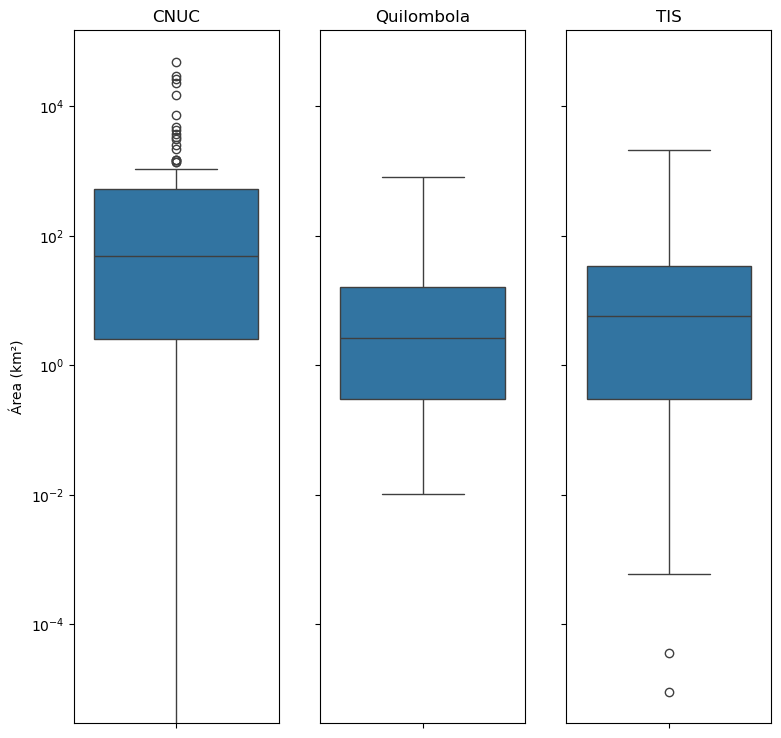

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(9, 9), sharey=True)

sns.set_style("whitegrid")

sns.boxplot(cnuc, y="area_sigef_km2", ax=axes[0])
axes[0].set_title("CNUC")
axes[0].set_ylabel("Área (km²)")
axes[0].set_yscale('log')

sns.boxplot(quilombola, y="area_sigef_km2", ax=axes[1])
axes[1].set_title("Quilombola")
axes[1].set_ylabel("Área (km²)")

sns.boxplot(tis, y="area_sigef_km2", ax=axes[2])
axes[2].set_title("TIS")
axes[2].set_ylabel("Área (km²)")

fig.show()

/tmp/ipykernel_14975/1376393022.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


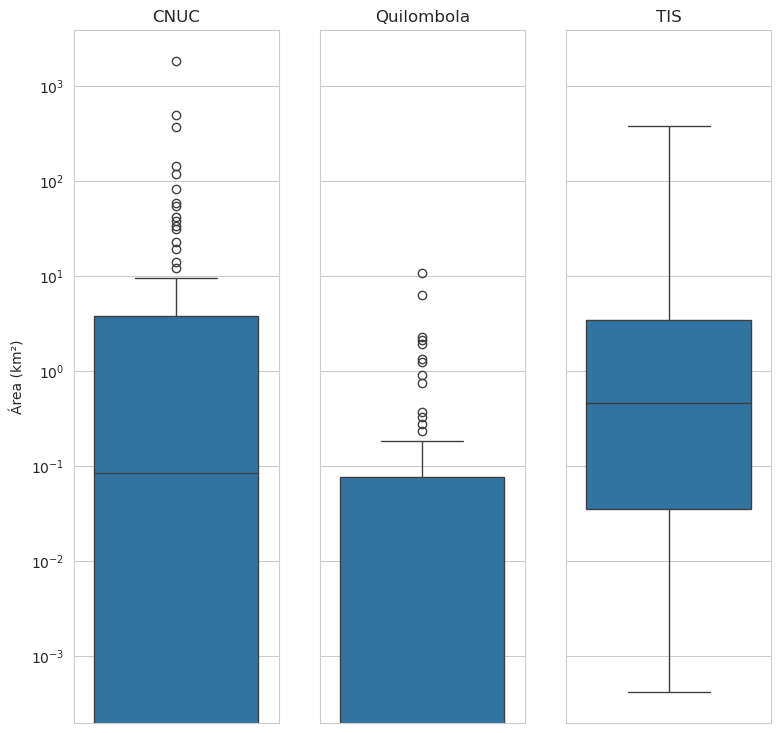

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(9, 9), sharey=True)

sns.set_style("whitegrid")

sns.boxplot(cnuc, y="a_alertas_km2", ax=axes[0])
axes[0].set_title("CNUC")
axes[0].set_ylabel("Área (km²)")

sns.boxplot(quilombola, y="a_alertas_km2", ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title("Quilombola")
axes[1].set_ylabel("Área (km²)")

sns.boxplot(tis, y="a_alertas_km2", ax=axes[2])
axes[2].set_title("TIS")
axes[2].set_ylabel("Área (km²)")

fig.show()

/tmp/ipykernel_14975/2259134656.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


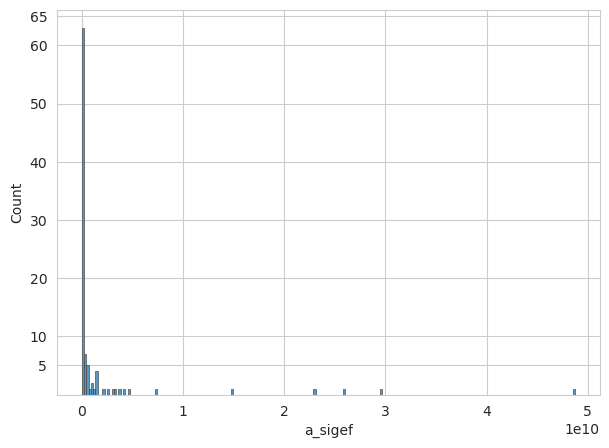

In [10]:
f, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    cnuc,
    x="a_sigef",
    edgecolor=".3",
    linewidth=.5
)

ax.set_yticks([5, 10,  20,  30,  40,  50,  60, 65])
f.show()

In [11]:
cnuc.sort_values("area_sigef_km2", ascending=False).head(5)

nome_uc    ha_total    uf  \
25  ÁREA DE PROTEÇÃO AMBIENTAL DO ARQUIPÉLAGO DO M...  4524746.89  PARÁ   
40                          FLORESTA ESTADUAL DO PARU  3610013.42  PARÁ   
94                 ESTAÇÃO ECOLÓGICA DA TERRA DO MEIO  3373111.24  PARÁ   
41        ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU  1679623.65  PARÁ   
18              ÁREA DE PROTEÇÃO AMBIENTAL DO TAPAJÓS  2040313.63  PARÁ   

                                            municipio situacao       a_sigef  \
25  afua , anajas , breves , cachoeira do arari , ...    Ativo  4.871608e+10   
40        alenquer , almeirim , monte alegre , obidos    Ativo  2.961114e+10   
94                      altamira , sao felix do xingu    Ativo  2.585186e+10   
41                      altamira , sao felix do xingu    Ativo  2.300491e+10   
18  itaituba , jacareacanga , novo progresso , tra...    Ativo  1.484493e+10   

    c_sigef     a_alertas  c_alertas  \
25     7305  1.413882e+07        626   
40      487  3.924614e+06         44   
94      247  1.177972e+08        423   
41     3382  1.810395e+09       2960   
18     1011  3.696307e+08       3031   

                                             geometry  area_sigef_km2  \
25  MULTIPOLYGON (((-51.01778 -0.83416, -51.01729 ...    48716.078169   
40  MULTIPOLYGON (((-54.49512 -1.15571, -54.49513 ...    29611.135317   
94  POLYGON ((-52.98983 -5.48073, -52.99272 -5.481...    25851.858773   
41  POLYGON ((-52.75802 -6.07755, -52.75614 -6.076...    23004.908674   
18  MULTIPOLYGON (((-57.63393 -6.12859, -57.63381 ...    14844.928463   

    a_alertas_km2  
25      14.138818  
40       3.924614  
94     117.797232  
41    1810.394948  
18     369.630673

In [12]:
cnuc.sort_values("a_alertas_km2", ascending=False).head(5)

nome_uc    ha_total    uf  \
41  ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU  1679623.65  PARÁ   
16                FLORESTA NACIONAL DO JAMANXIM  1301551.62  PARÁ   
18        ÁREA DE PROTEÇÃO AMBIENTAL DO TAPAJÓS  2040313.63  PARÁ   
74                FLORESTA NACIONAL DE ALTAMIRA   725418.14  PARÁ   
94           ESTAÇÃO ECOLÓGICA DA TERRA DO MEIO  3373111.24  PARÁ   

                                            municipio situacao       a_sigef  \
41                      altamira , sao felix do xingu    Ativo  2.300491e+10   
16                          itaituba , novo progresso    Ativo  7.264551e+09   
18  itaituba , jacareacanga , novo progresso , tra...    Ativo  1.484493e+10   
74                      altamira , itaituba , trairao    Ativo  3.791692e+08   
94                      altamira , sao felix do xingu    Ativo  2.585186e+10   

    c_sigef     a_alertas  c_alertas  \
41     3382  1.810395e+09       2960   
16      454  4.967942e+08        646   
18     1011  3.696307e+08       3031   
74       54  1.453858e+08        278   
94      247  1.177972e+08        423   

                                             geometry  area_sigef_km2  \
41  POLYGON ((-52.75802 -6.07755, -52.75614 -6.076...    23004.908674   
16  POLYGON ((-55.76796 -6.35064, -55.68677 -6.354...     7264.551137   
18  MULTIPOLYGON (((-57.63393 -6.12859, -57.63381 ...    14844.928463   
74  POLYGON ((-54.91714 -5.4026, -54.66689 -6.3180...      379.169202   
94  POLYGON ((-52.98983 -5.48073, -52.99272 -5.481...    25851.858773   

    a_alertas_km2  
41    1810.394948  
16     496.794176  
18     369.630673  
74     145.385838  
94     117.797232

In [8]:
alertas = gpd.read_file("areas-PA/area-alertas-filtrado/alertas_pa/alertas_pa_filtrado.shp")
alertas.sample(5)

/home/toledo-cia/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: areas-PA/area-alertas-filtrado/alertas_pa/alertas_pa_filtrado.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


CODEALERTA                  FONTE     BIOMA ESTADO  \
69887      243066                  {SAD}  Amazônia   PARÁ   
86535     1148243                  {SAD}  Amazônia   PARÁ   
83123     1064470  {DETERB-AMAZONIA,SAD}  Amazônia   PARÁ   
5121       754445  {DETERB-AMAZONIA,SAD}  Amazônia   PARÁ   
64289      263946                  {SAD}  Amazônia   PARÁ   

                   MUNICIPIO  AREAHA  ANODETEC  DATADETEC   DTIMGANT  \
69887               itaituba    0.67    2020.0 2020-10-01 2020-07-15   
86535               alenquer    2.78    2023.0 2023-10-01 2023-10-07   
83123              ruropolis   12.68    2023.0 2023-09-01 2023-09-06   
5121               ruropolis   11.25    2022.0 2022-11-01 2022-09-24   
64289  senador jose porfirio    1.86    2020.0 2020-11-01 2020-10-09   

        DTIMGDEP    DTPUBLI     VPRESSAO  \
69887 2020-11-20 2020-11-23  agriculture   
86535 2023-12-09 2023-12-19  agriculture   
83123 2023-09-27 2023-11-09  agriculture   
5121  2022-11-22 2022-12-21  agriculture   
64289 2020-12-23 2020-12-18  agriculture   

                                                geometry  
69887  POLYGON ((-55.78634 -6.14645, -55.78664 -6.146...  
86535  MULTIPOLYGON (((-55.25173 -1.42993, -55.25182 ...  
83123  POLYGON ((-54.97865 -4.40066, -54.97854 -4.400...  
5121   POLYGON ((-55.23807 -4.23626, -55.23828 -4.236...  
64289  MULTIPOLYGON (((-52.25813 -3.80776, -52.25819 ...

In [9]:
sigef = gpd.read_file("areas-PA/area-imovel-filtrado/sigef_pa/sigef_pa_filtrado.shp")
sigef.sample(5) 

cod_imovel ind_tipo     municipio  \
63029   PA-1501006-D4FD0DE142CF4A18821CB1B01B59574D      AST        aveiro   
208138  PA-1505650-0FD2CDA789384B93B18294331A74C939      IRU        placas   
215745  PA-1501402-BD4D7043BFE54408A08AF65FBDD1EDFF      IRU         belem   
220154  PA-1500107-ACD37307CD984831AEB9A2299C0489B6      IRU    abaetetuba   
113773  PA-1504802-C74F2461B44E4E0AA225BDF9AF235830      IRU  monte alegre   

         num_area  dat_criaca  \
63029   9523.8108  28/04/2016   
208138   101.8966  20/11/2015   
215745     0.0141  02/10/2024   
220154     0.8847  31/05/2023   
113773   115.6525  21/11/2015   

                                                 geometry  
63029   POLYGON ((-55.82857 -3.90779, -55.82076 -3.906...  
208138  POLYGON ((-54.8043 -3.71615, -54.8022 -3.72048...  
215745  POLYGON ((-48.33759 -1.06379, -48.33763 -1.063...  
220154  POLYGON ((-48.68469 -1.7668, -48.6845 -1.76557...  
113773  POLYGON ((-54.12501 -1.8259, -54.1147 -1.83026...

In [10]:
from pyproj import Geod

def convert_cart2meter(geo):
    return abs(Geod(ellps="WGS84").geometry_area_perimeter(geo)[0])

cnuc_selec = ["ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU", "ÁREA DE PROTEÇÃO AMBIENTAL DO TAPAJÓS", "ESTAÇÃO ECOLÓGICA DA TERRA DO MEIO"]
cnuc_final = cnuc[cnuc["nome_uc"].isin(cnuc_selec)]

cnuc_final["area_metro"] = cnuc_final["geometry"].apply(convert_cart2meter)
cnuc_final["area_km2"] = cnuc_final["area_metro"] / 1000000
cnuc_final = cnuc_final.drop(columns=["a_sigef", "a_alertas", "area_metro", "ha_total", "uf", "situacao"])
cnuc_final["nome_uc"] = cnuc_final["nome_uc"].str.title()
cnuc_final.rename(columns={"area_sigef_km2": "sigef_km2", "a_alertas_km2": "alerta_km2"}, inplace=True)
cnuc_final.to_file("areas-PA/áreas-selecionadas/cnuc/cnuc.shp")

/home/toledo-cia/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/toledo-cia/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [16]:
cnuc_final["sobreposicao"] = cnuc_final["sigef_km2"] / cnuc_final["area_km2"] * 100
cnuc_final

nome_uc  \
18        Área De Proteção Ambiental Do Tapajós   
41  Área De Proteção Ambiental Triunfo Do Xingu   
94           Estação Ecológica Da Terra Do Meio   

                                            municipio  c_sigef  c_alertas  \
18  itaituba , jacareacanga , novo progresso , tra...     1011       3031   
41                      altamira , sao felix do xingu     3382       2960   
94                      altamira , sao felix do xingu      247        423   

                                             geometry     sigef_km2  \
18  MULTIPOLYGON (((-57.63393 -6.12859, -57.63381 ...  14844.928463   
41  POLYGON ((-52.75802 -6.07755, -52.75614 -6.076...  23004.908674   
94  POLYGON ((-52.98983 -5.48073, -52.99272 -5.481...  25851.858773   

     alerta_km2      area_km2  sobreposicao  
18   369.630673  20403.417345     72.757069  
41  1810.394948  16796.441835    136.962988  
94   117.797232  33731.529062     76.640044

In [11]:
from pyproj import Geod

sigef["is_in"] = 0
sigef["invadindo"] = ""
alertas["is_in"] = 0
alertas["invadindo"] = ""

for i, row in cnuc_final.iterrows():
    geod = Geod(ellps="WGS84")
    muns = set() # Armazenando em um conjunto porque não queremos municípios repetidos
    for k in row["municipio"].split(" , "): # Iterando na lista, podendo ser uma lista de apenas um município
        muns.add(k.strip()) # Removendo espaços, e colocando ele no conjunto
    for j, row_j in sigef[sigef["municipio"].isin(muns)].iterrows(): # iterando na base, e filtrando apenas com os municípios que estão na linha da iteração CNUC
            geod_area = abs(geod.geometry_area_perimeter(row["geometry"].intersection(row_j["geometry"]))[0]) # Calculando a área de interseção entre as geometrias, e somando a área
            if geod_area > 0:
                sigef.at[j, "is_in"] = 1
                sigef.at[j, "invadindo"] = row["nome_uc"]

    for j, row_j in alertas[alertas["MUNICIPIO"].isin(muns)].iterrows(): # iterando na base, e filtrando apenas com os municípios que estão na linha da iteração CNUC
        geod_area = abs(geod.geometry_area_perimeter(row["geometry"].intersection(row_j["geometry"]))[0]) # Calculando a área de interseção entre as geometrias, e somando a área
        if geod_area > 0:
           alertas.at[j, "is_in"] = 1
           alertas.at[j, "invadindo"] = row["nome_uc"]

sigef_final = sigef[sigef["is_in"] == 1]
alertas_final = alertas[alertas["is_in"] == 1]

In [13]:
sigef_final.drop(columns=["is_in"], inplace=True)
alertas_final.drop(columns=["is_in"], inplace=True)

sigef_final.to_file("areas-PA/áreas-selecionadas/sigef/sigef.shp")
alertas_final.to_file("areas-PA/áreas-selecionadas/alertas/alertas.shp")

/tmp/ipykernel_42362/2323944716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigef_final.drop(columns=["is_in"], inplace=True)
/tmp/ipykernel_42362/2323944716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertas_final.drop(columns=["is_in"], inplace=True)
/home/toledo-cia/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Field DATADETEC create as date field, though DateTime requested.
  ogr_write(
/home/toledo-cia/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Field DTIMGANT create as date field, though DateTime requested.
  ogr_write(
/home/toledo-cia/